# Neural Networks
### Contents
- Solving OR Gate problem using Adaline
- Solving the XOR Gate problem using Madaline

### Author
#### Aayushi Shrivastava

#### Date
24.11.2022

### Program #1

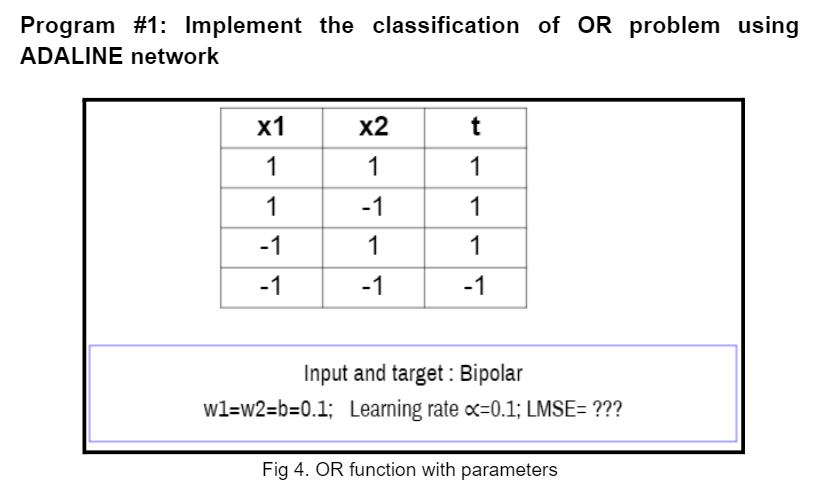

In [6]:
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [115]:
class ActivationFunctions:
    def __init__(self):
        pass
    @classmethod
    def binary(self, y, theta=0):
        """
        If the value of Y is above a certain value known as the threshold,
        the output is True(or activated)
        If it’s less than the threshold then the output is false (or not activated)
        Returns:
            Either 0 or 1
        """
        if y >= theta:
            return 1
        return 0

    def bipolar_step(self, y, theta=0):
        """
        If the value of Y is above a certain value known as the threshold,
        the output is +1 and 
        if it’s less than the threshold then the output is -1. 
        Returns:
            It has bipolar outputs (+1 to -1).
        """
        if y >= theta:
            return 1
        return -1

    def binary_sigmoidal(self, y):
        """
        Also known as Logistic Function/Sigmoid Function
        Differentiable, non-linear, and produces non-binary activations 
        But the problem with Sigmoid vanishing gradients and not a zero-centric function.
        Returns:
            Values are either binary or vary from 0 to 1. 
        """
        return 1/(1+math.exp(-y))

    def bipolar_sigmoid(self, y):
        """
        Also known as Hyperbolic Tangent Function or Tanh
        The Tanh activation function is calculated as follows:
        (e^x – e^-x) / (e^x + e^-x)
        
        The function takes any real value as input and outputs values in the range -1 to 1. 
        The larger the input (more positive), the closer the output value will be to 1.0, 
        whereas the smaller the input (more negative), the closer the output will be to -1.0.
        Returns:
           Output within the range -1 and 1
           
        """
        return math.tanh(y)

    def signum(self, y):
        if y<0:
            return -1
        elif y>0:
            return 1
        return 0

In [116]:
def plot_type(plt_type):
        if plt_type == "and":
        #Plot the points
            x, y = inputs.T
            fig, ax = plt.subplots(figsize=(11,8))
            plt.title('AND Gate Target Plot and Classifier Line')
            x2 = []
            for i in range(0,len(x)):
                if (x[i]==1 and y[i]==1):
                    ax.plot(x[i], y[i], marker='x', linestyle='', ms=12)
                else:
                    ax.plot(x[i], y[i], marker='o', linestyle='', ms=12)
            plt.plot([2,-2],[0,2])
        if plt_type == "or":
            x, y = inputs.T
            fig, ax = plt.subplots(figsize=(11,8))
            plt.title('AND Gate Target Plot and Classifier Line')
            x2 = []
            for i in range(0,len(x)):
                if (x[i]==-1 and y[i]==-1):
                    ax.plot(x[i], y[i], marker='x', linestyle='', ms=12)
                else:
                    ax.plot(x[i], y[i], marker='o', linestyle='', ms=12)
            plt.plot([-1,0],[0,-1])

In [123]:
def AdalineNetwork(inputs,wt,tgt,epoch,learning_rate,bias,activation="bipolar_step",plt_type=None):
    """
        Args:
            inputs(np.array): An array of input rows.
            wt(np.array): An array of input weights for the perceptron
            tgt(int): Target/Labels/Output of Input data.
            epoch(int): Number of epochs
            learning_rate(float): Learning rate
            bias(float): Bias for the perceptron
            plot(bool): Plots the Target. 
            Turn to True if you want to plot the graph.
    """
    rows = []
    X_cols = []
    w_cols = []
    ocols = ['bias','Yin','Yout']
    for xi in range(0,inputs.shape[1]):
        X_cols.append(f"X{xi}")
        w_cols.append(f"wt{xi}")
    X_cols.append('T')
    X_cols.extend(w_cols)
    X_cols.extend(ocols)
    cols=X_cols
    #--Comments disabled for debugging
    #print(cols)
    for epoch in range(0,epoch):
        for i in range(0,inputs.shape[0]):
            data = []
            #print("------Row:",inputs[i])
            #print("Weight",wt,"Bias",bias)
            yin = np.dot(inputs[i],wt) + bias
            activation_func = {
                               "binary": ActivationFunctions().binary(yin),
                               "bipolar_step": ActivationFunctions().bipolar_step(yin),
                               "binary_sigmoidal": ActivationFunctions().binary_sigmoidal(yin),
                               "bipolar_sigmoid": ActivationFunctions().bipolar_sigmoid(yin)
            }
            yout = activation_func[activation]
            #print("Yin,Yout",yin,yout)
            data.extend(inputs[i])
            data.append(tgt[i])
            data.extend(wt)
            data.extend([bias,yin,yout])
            for j in range(0,inputs.shape[1]):
                #print(yout!=tgt[i])
                if yout != tgt[i]:
                    wt[j] = wt[j] + learning_rate*(tgt[i]-yin)*inputs[i][j]
                    #print(f"W{j}", wt[j])
                    if j+1 == inputs.shape[1]:
                        bias = bias + learning_rate*(tgt[i]-yin)
                        #print("B",bias)
            rows.append(data)
    #print(rows)
    df = pd.DataFrame(rows, columns=cols)
    if plt_type:
        plot_type(plt_type)
    return df

In [124]:
inputs = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
w = np.array([0.1,0.1])
t = np.array([1,1,1,-1])
b = 0.1
alpha = 0.1

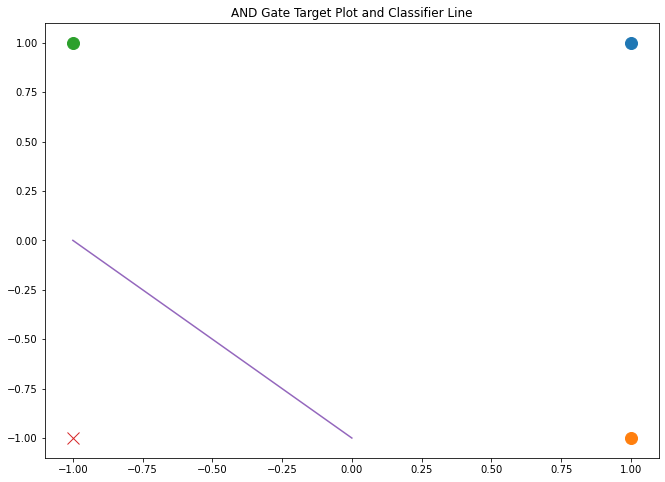

In [125]:
df = AdalineNetwork(inputs=inputs,wt=w,tgt=t,epoch=1,learning_rate=alpha,bias=b,activation="bipolar_step",plt_type="or")

In [126]:
df

,X0,X1,T,wt0,wt1,bias,Yin,Yout
0,1,1,1,0.1,0.1,0.1,0.3,1
1,1,-1,1,0.1,0.1,0.1,0.1,1
2,-1,1,1,0.1,0.1,0.1,0.1,1
3,-1,-1,-1,0.1,0.1,0.1,-0.1,-1


In [127]:
df["squared_error"] = (df['T']-df['Yout'])**2

In [128]:
df

,X0,X1,T,wt0,wt1,bias,Yin,Yout,squared_error
0,1,1,1,0.1,0.1,0.1,0.3,1,0
1,1,-1,1,0.1,0.1,0.1,0.1,1,0
2,-1,1,1,0.1,0.1,0.1,0.1,1,0
3,-1,-1,-1,0.1,0.1,0.1,-0.1,-1,0


In [129]:
LMSE = df['squared_error'].sum()/len(df['squared_error'])

In [130]:
#Since we are obtaining perfect results for the given parameters,
#the LMSE remains 0
print("LMSE:",LMSE)

LMSE: 0.0


### Testing with different weights 

In [49]:
inputs = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
w = np.array([0.1,0.45])
t = np.array([1,1,1,-1])
b = 0.1
alpha = 0.1

In [50]:
df2 = AdalineNetwork(inputs=inputs,wt=w,tgt=t,epoch=2,learning_rate=alpha,bias=b)

In [51]:
df2

,X0,X1,T,wt0,wt1,bias,Yin,Yout
0,1,1,1,0.100,0.450,0.100,0.650,1
1,1,-1,1,0.100,0.450,0.100,-0.250,-1
2,-1,1,1,0.225,0.325,0.225,0.325,1
3,-1,-1,-1,0.225,0.325,0.225,-0.325,-1
4,1,1,1,0.225,0.325,0.225,0.775,1
5,1,-1,1,0.225,0.325,0.225,0.125,1
6,-1,1,1,0.225,0.325,0.225,0.325,1
7,-1,-1,-1,0.225,0.325,0.225,-0.325,-1


In [131]:
df2["squared_error"] = (df2['T']-df2['Yout'])**2

In [132]:
df2

,X0,X1,T,wt0,wt1,bias,Yin,Yout,squared_error
0,1,1,1,0.100,0.450,0.100,0.650,1,0
1,1,-1,1,0.100,0.450,0.100,-0.250,-1,4
2,-1,1,1,0.225,0.325,0.225,0.325,1,0
3,-1,-1,-1,0.225,0.325,0.225,-0.325,-1,0
4,1,1,1,0.225,0.325,0.225,0.775,1,0
5,1,-1,1,0.225,0.325,0.225,0.125,1,0
6,-1,1,1,0.225,0.325,0.225,0.325,1,0
7,-1,-1,-1,0.225,0.325,0.225,-0.325,-1,0
